<a href="https://colab.research.google.com/github/AngelTroncoso/Depocitos_lead_scoring/blob/main/depositos_lead_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rankeo de *leads*.

Imagina que trabajas para un banco y este banco ofrece inversiones a plazo fijo a sus clientes. Como parte de una campaña para ampliar la cantidad de inversiones a plazo fijo que sus clientes han adquirido, la compañía utiliza diversos métodos de contacto, entre los cuales el teléfono es todavía una de las formas más efectivas.

Al banco le encantaría llamar a todos sus clientes, sin embargo, esto no es posible porque el call center no se da abasto y es importante priorizar a quienes hay que llamar para garantizar el máximo número de conversiones.

**Tu tarea es encontrar una forma de clasificar y rankear (ordenar) las llamadas de tal modo que los agentes del centro de llamadas, llame primero a quien tiene más probabilidades de depositar su dinero.**

![](https://ik.imagekit.io/thatcsharpguy/projects/codigo-facilito/machine-learning/deposito-header.jpg?ik-sdk-version=javascript-1.4.3&updatedAt=1669051927251)

## Código

### [https://github.com/fferegrino/cf-ml/tree/main/term-deposit](https://github.com/fferegrino/cf-ml/tree/main/term-deposit)

## Dataset

Este dataset es una versión modificada de [Term Deposit Prediction Data Set](https://www.kaggle.com/datasets/brajeshmohapatra/term-deposit-prediction-data-set) disponible en Kaggle.



## Solución  

La empresa tiene información de clientes anteriores que en algún momento han sido contactados en el pasado comprar la inversión en el pasado sin importar si lo compraron o no. Esta información está contenida en el archivo `train.csv`.

Así mismo, para ayudarte hay un archivo llamado `test.csv` con datos de otros clientes pero que deberás usar para probar tus resultados.

**Como no tenemos más información más allá de si un cliente compró o no compró, vamos a utilizar las probabilidades que nos de un modelo de clasificación para decidir quién tiene más probabilidades de convertir**.

Este problema se conoce como *lead scoring*.

### Descripción de los datos

| Variable     | Definición                                                              |
|--------------|-------------------------------------------------------------------------|
| *ID*         | Identificador único del cliente                                         |
| *age*        | Edad del cliente                                                        |
| *job*        | Trabajo que desempeña el cliente                                        |
| *marital*    | Estado marital del cliente                                              |
| *education*  | Nivel de educación del cliente                                          |
| *default*    | Especifica si el cliente tiene una deuda no pagada                      |
| *balance*    | Saldo promedio anual del cliente                                        |
| *housing*    | Indica si el cliente tiene una hipoteca con el banco                    |
| *loan*       | Indica si el cliente tiene un préstamo personal                         |
| *contact*    | El medio por el cual se ha estado contactando al cliente                |
| *month*      | El mes en el que se contactó al cliente                                 |
| *day*        | El día en el que se contactó al cliente                                 |
| *duration*   | Duración del contacto con el cliente                                    |
| *campaign*   | El número de veces que el banco se ha puesto en contacto con el cliente |
| *pdays*      | Número de días que han transcurrido desde el último contacto            |
| *previous*   | Número de veces que se ha contactado al cliente antes de esta campaña   |
| *poutcome*   | Si el cliente ha comprado productos como resutlado de la campaña previa |
| *subscribed* | Si el cliente se suscribió como resultado de la campaña más reciente    |


In [4]:
import pandas as pd
import numpy as np

In [5]:
url = 'https://raw.githubusercontent.com/fferegrino/cf-ml/295083c137dd7b194421e5b9c3f9863155ef0557/term-deposit/train.csv'
train = pd.read_csv(url)
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## EDA

In [12]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
import seaborn as sns

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b554133385e4222e328405d3a1d315689121b7107a8f28384b70b226b3711955
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [13]:
profile = ProfileReport(train, title="Raw Deposit Dataset Analysis", explorative=True)
profile.to_file("deposit-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:02<00:00,  6.16it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Desbalance de clases

Text(0.5, 1.0, 'Target variable distribution\nNo: 27932 (88.26%) | Yes: 3715 (11.74%) ')

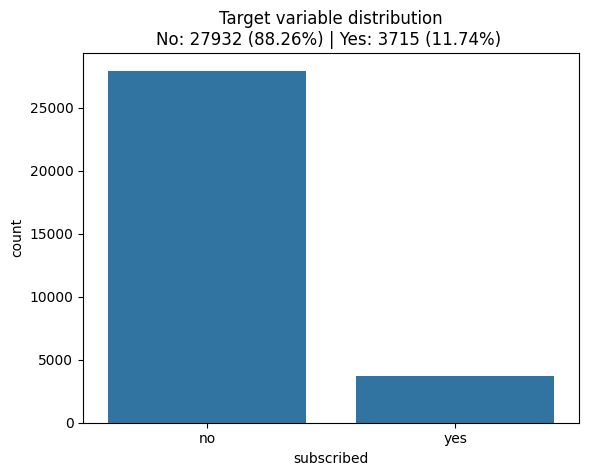

In [14]:
subscribed_proportion = (train['subscribed'].value_counts()).to_dict()
ax = sns.countplot(x=train["subscribed"])
title = ("Target variable distribution\n"
    f"No: {subscribed_proportion['no']} ({(subscribed_proportion['no']/len(train)):0.2%}) |"
    f" Yes: {subscribed_proportion['yes']} ({(subscribed_proportion['yes']/len(train)):0.2%}) " )
ax.set_title(title)

### Relación entre columnas

<Axes: xlabel='subscribed', ylabel='count'>

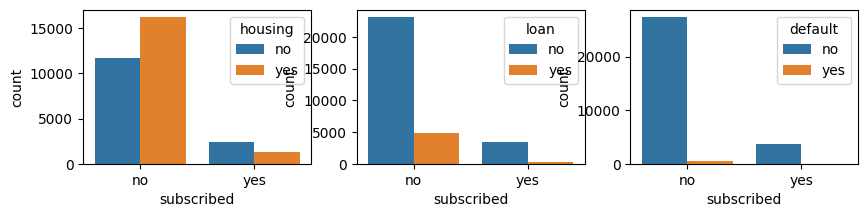

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, figsize=(10, 2))

sns.countplot(x='subscribed', hue='housing', data=train, ax=axs[0])
sns.countplot(x='subscribed', hue='loan', data=train, ax=axs[1])
sns.countplot(x='subscribed', hue='default', data=train, ax=axs[2])

## Elimina la columna de ID

El ID no contiene ninguna información que nos pueda ayudar a encontrar los mejores resultados puesto que es único para cada cliente.

In [16]:
train.drop(['ID'], axis='columns', inplace=True)

## *One-hot encode* el estatus marital

In [17]:
from sklearn.preprocessing import OneHotEncoder
marital_encoder = OneHotEncoder()

marital_encoder.fit(train[['marital']])
encoded_marital = marital_encoder.transform(train[['marital']])

In [18]:
encoded_marital = pd.DataFrame(encoded_marital.toarray(), columns=marital_encoder.categories_)
encoded_marital['original_value'] = train['marital']
encoded_marital

,divorced,married,single,original_value
0,0.0,1.0,0.0,married
1,0.0,1.0,0.0,married
2,0.0,1.0,0.0,married
3,1.0,0.0,0.0,divorced
4,0.0,1.0,0.0,married
...,...,...,...,...
31642,0.0,0.0,1.0,single
31643,1.0,0.0,0.0,divorced
31644,0.0,0.0,1.0,single
31645,0.0,1.0,0.0,married


## *Binnea* y codifica la variable edad

In [30]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class CutTransformer(BaseEstimator, TransformerMixin):
    """
    Un transformador que agrupa datos numéricos usando pandas.cut.
    """
    def __init__(self, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', as_str=False):
        self.bins = bins
        self.right = right
        self.labels = labels
        self.retbins = retbins
        self.precision = precision
        self.include_lowest = include_lowest
        self.duplicates = duplicates
        self.as_str = as_str # Parámetro personalizado

    def fit(self, X, y=None):
        # pd.cut no requiere un paso de ajuste sobre los datos en sí,
        # pero podemos almacenar alguna información si es necesario.
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        # Aplicar pd.cut a cada columna
        transformed_X = X.apply(
            lambda col: pd.cut(
                col,
                bins=self.bins,
                right=self.right,
                labels=self.labels,
                retbins=self.retbins,
                precision=self.precision,
                include_lowest=self.include_lowest,
                duplicates=self.duplicates
            )
        )

        if self.as_str:
             # Convertir los intervalos resultantes a cadenas si as_str es True
             transformed_X = transformed_X.astype(str)


        return transformed_X

class YesNoTransformer(BaseEstimator, TransformerMixin):
    """
    Un transformador que mapea 'yes' a 1 y 'no' a 0.
    """
    def fit(self, X, y=None):
        # YesNoTransformer no requiere un paso de ajuste
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        # Mapear 'yes' a 1 y 'no' a 0
        transformed_X = X.apply(lambda col: np.where(col == 'yes', 1, 0))

        return transformed_X

In [32]:
#from custom_transformers import CutTransformer

In [33]:
age_bin = CutTransformer(bins = [0, 20, 30, 40, 50, 60, 1000], as_str=True)

In [34]:
age_frame = train[['age']].copy()
age_encoded = age_bin.fit_transform(age_frame[['age']])
age_frame['age_encoded'] = age_encoded

In [35]:
age_frame

,age,age_encoded
0,56,"(50, 60]"
1,31,"(30, 40]"
2,27,"(20, 30]"
3,57,"(50, 60]"
4,31,"(30, 40]"
...,...,...
31642,29,"(20, 30]"
31643,53,"(50, 60]"
31644,32,"(30, 40]"
31645,57,"(50, 60]"


In [36]:
age_one_hot_encoder = OneHotEncoder()

In [37]:
_ = age_one_hot_encoder.fit(age_frame[['age_encoded']])

In [38]:
one_hot_encoded_ages = pd.DataFrame(
    age_one_hot_encoder.transform(age_frame[['age_encoded']]).toarray(),
    columns=age_one_hot_encoder.categories_
)

In [39]:
pd.merge(age_frame, one_hot_encoded_ages, left_index=True, right_index=True)

,age,age_encoded,"((0, 20],)","((20, 30],)","((30, 40],)","((40, 50],)","((50, 60],)","((60, 1000],)"
0,56,"(50, 60]",0.0,0.0,0.0,0.0,1.0,0.0
1,31,"(30, 40]",0.0,0.0,1.0,0.0,0.0,0.0
2,27,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0
3,57,"(50, 60]",0.0,0.0,0.0,0.0,1.0,0.0
4,31,"(30, 40]",0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
31642,29,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0
31643,53,"(50, 60]",0.0,0.0,0.0,0.0,1.0,0.0
31644,32,"(30, 40]",0.0,0.0,1.0,0.0,0.0,0.0
31645,57,"(50, 60]",0.0,0.0,0.0,0.0,1.0,0.0


## Escala los datos numéricos

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
balance_scaler = StandardScaler()

In [42]:
balance_scaled = train[['balance']].copy()

In [43]:
balance_scaled['balance_scaled'] = balance_scaler.fit_transform(balance_scaled[['balance']])

In [44]:
balance_scaled

,balance,balance_scaled
0,1933,0.187933
1,3,-0.449397
2,891,-0.156159
3,3287,0.635055
4,119,-0.411091
...,...,...
31642,0,-0.450388
31643,380,-0.324903
31644,312,-0.347358
31645,225,-0.376088


## Convierte *"yes"* y *"no"* a enteros

In [46]:
yes_no_transformer = YesNoTransformer()

In [47]:
housing_loan_frame = train[['housing', 'loan']].copy()

In [48]:
housing_loan_frame[['housing_mapped', 'loan_mapped']] = yes_no_transformer.fit_transform(housing_loan_frame)

In [49]:
housing_loan_frame

,housing,loan,housing_mapped,loan_mapped
0,no,no,0,0
1,no,no,0,0
2,yes,no,1,0
3,no,no,0,0
4,yes,no,1,0
...,...,...,...,...
31642,yes,no,1,0
31643,no,yes,0,1
31644,no,no,0,0
31645,yes,no,1,0


## Empaca todos los artefactos en un pipeline

La gestión de los artefactos puede volverse un problema cuando estamos lidiando con múltiples transformadores y estimadores. En nuestro caso tenemos *One-Hot encoders*, un *Cut transformer*, escalador *estandar*...

Una forma de no tener que preocuparnos por elementos individuales es agruparlos todos en un pipeline y almacenarlo todo en conjunto.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder # Ensure OneHotEncoder is imported
from sklearn.preprocessing import StandardScaler # Ensure StandardScaler is imported

# One-Hot encode marital status
one_hot_encode_categoricals = ColumnTransformer([
    (
        'one_hot_encode_marital', # Nombre de la transformación
        OneHotEncoder(), # Transformación a aplicar - Removed sparse=False
        ["marital", 'contact', 'education', 'poutcome'] # Columnas involucradas
    )
])

# Bin and encode age
bin_and_encode_age_pipeline = Pipeline([
    ('bin_age', CutTransformer(bins =  [0, 20, 30, 40, 50, 60, 1000], as_str=True)),
    ('encode_age', OneHotEncoder()),
])

bin_and_encode_age = ColumnTransformer([
    ('bin_and_encode_age', bin_and_encode_age_pipeline, ["age"])
])

# Scale balance
scale_balance = ColumnTransformer([
    (
        'scale_balance', # Nombre de la transformación
        StandardScaler(), # Transformación a aplicar
        ["balance"] # Columnas involucradas
    )
])

# Map housing and loan
map_housing_loan = ColumnTransformer([
    (
        'map_housing_loan', # Nombre de la transformación
        YesNoTransformer(), # Transformación a aplicar
        ["housing", 'loan', 'default'] # Columnas involucradas
    )
])

passthrough = ColumnTransformer([('passthrough', 'passthrough', ['campaign', "pdays", "duration", "previous"])])

# Ensambla todo el pipeline
feature_pipeline = Pipeline([
    (
        'features',
        FeatureUnion([
            ('one_hot_encode_categoricals', one_hot_encode_categoricals),
            ('bin_and_encode_age', bin_and_encode_age),
            ('scale_balance', scale_balance),
            ('passthrough', passthrough),
            ('map_housing_loan', map_housing_loan),
        ])
    )
])

In [52]:
from sklearn import set_config

set_config(display="diagram")
feature_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('one_hot_encode_categoricals',
                                                 ColumnTransformer(transformers=[('one_hot_encode_marital',
                                                                                  OneHotEncoder(),
                                                                                  ['marital',
                                                                                   'contact',
                                                                                   'education',
                                                                                   'poutcome'])])),
                                                ('bin_and_encode_age',
                                                 ColumnTransformer(transformers=[('bin_and_encode_age',
                                                                                  Pipeline(steps=[('bin_age',
                                                                                                   CutTransformer(as_str=True,
                                                                                                                  bins=[0...
                                                ('scale_balance',
                                                 ColumnTransformer(transformers=[('scale_balance',
                                                                                  StandardScaler(),
                                                                                  ['balance'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['campaign',
                                                                                   'pdays',
                                                                                   'duration',
                                                                                   'previous'])])),
                                                ('map_housing_loan',
                                                 ColumnTransformer(transformers=[('map_housing_loan',
                                                                                  YesNoTransformer(),
                                                                                  ['housing',
                                                                                   'loan',
                                                                                   'default'])]))]))])

In [53]:
feature_pipeline.fit(train)

temp_train = pd.DataFrame(feature_pipeline.transform(train).toarray())
temp_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.187933,2.0,-1.0,44.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.449397,2.0,-1.0,91.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.156159,1.0,-1.0,240.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.635055,1.0,84.0,867.0,3.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.411091,1.0,-1.0,380.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.450388,2.0,-1.0,116.0,0.0,1.0,0.0,0.0
31643,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,-0.324903,2.0,-1.0,438.0,0.0,0.0,1.0,0.0
31644,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.347358,3.0,-1.0,37.0,0.0,0.0,0.0,0.0
31645,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,-0.376088,7.0,337.0,22.0,12.0,1.0,0.0,0.0


In [54]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


## Convierte el *target* a enteros

In [55]:
subscribed_frame = train[['subscribed']].copy()
subscribed_frame['encoded'] = np.where(subscribed_frame['subscribed'] == 'yes', 1, 0)

subscribed_frame.head(10)

,subscribed,encoded
0,no,0
1,no,0
2,no,0
3,yes,1
4,no,0
5,no,0
6,yes,1
7,no,0
8,no,0
9,no,0


In [56]:
training_target_encoded = np.where(subscribed_frame['subscribed'] == 'yes', 1, 0)

## Encuentra los mejores parámetros

In [57]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
search_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier())
])

In [59]:
param_grid = {
    "model__n_estimators": [100, 200, 300],
    'model__max_depth': [4, 5, 6],
    # 'model__subsample': [0.5, 1],
    # 'model__scale_pos_weight': [1, 7.5],
    # 'model__eta': [0.01, 0.1, 0.2, 0.3]
}
search = GridSearchCV(search_pipeline, param_grid, n_jobs=-1, scoring='precision')
_ = search.fit(train, training_target_encoded)

In [60]:
best_params = {key[7:]:value for key, value in search.best_params_.items()}
print("Best parameters:", best_params)
print(f"Best score: {search.best_score_:0.3%}")

Best parameters: {'max_depth': 4, 'n_estimators': 100}
Best score: 62.808%


## Reentrena el mejor modelo con los mejores parámetros

A pesar de que puedes utilizar el modelo entrenado usando `search.best_estimator_`, es una buena idea **reentrenar** un modelo nuevo **utilizando los mejores parámetros** recien obtenidos y **todos los datos disponibles para entrenamiento**.

In [61]:
inference_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier(**best_params))
])
_ = inference_pipeline.fit(train, training_target_encoded)

In [62]:
predicciones = inference_pipeline.predict(train)

In [63]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix

def evaluate(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    print(confusion_matrix(y_true, y_pred))

    print(f"{recall:0.2%} {accuracy:0.2%} {precision:0.2%}")

In [64]:
evaluate(training_target_encoded, predicciones)

[[27315   617]
 [ 1978  1737]]
46.76% 91.80% 73.79%


## Evaluando con los datos de prueba

In [67]:
url = 'https://raw.githubusercontent.com/fferegrino/cf-ml/295083c137dd7b194421e5b9c3f9863155ef0557/term-deposit/test.csv'
test = pd.read_csv(url)

In [68]:
predicciones_test = inference_pipeline.predict(test)
predicciones_test

evaluate(np.where(test['subscribed'] == 'yes', 1, 0), predicciones_test)

[[11624   366]
 [  965   609]]
38.69% 90.19% 62.46%


In [69]:
test['subscribed'].value_counts()

,count
subscribed,
no,11990
yes,1574


## Guardando todo el pipeline

In [70]:
import pickle

with open("lead_scoring.pickle", "wb") as wb:
    pickle.dump(inference_pipeline, wb)

## ¿Y el lead scoring?

In [71]:
with open("lead_scoring.pickle", "rb") as rb:
    lead_scoring = pickle.load(rb)

In [72]:
probabilidades = lead_scoring.predict_proba(test)

 > ℹ️ `predict_proba` regresa un arreglo de tamaño *(n_samples, n_classes)*, en donde las clases están dadas en el orden dictado por `lead_scoring.classes_`

In [73]:
lead_scoring.classes_

array([0, 1])

In [74]:
test['score'] = probabilidades[:, 1]

In [75]:
test[["ID", "score"]].sort_values('score', ascending=False)

,ID,score
9946,44736,0.967624
7428,43933,0.962626
11975,42275,0.962611
12183,45012,0.960402
2329,44202,0.960213
...,...,...
4742,23458,0.000010
2476,7870,0.000008
9641,36051,0.000006
10704,11881,0.000005


####